Importing all necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('flight_price.xlsx')

Raeding the data set

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


***Dataset has 10683 rows and 11 columns***

In [7]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


**Cleaning the data set**

In [8]:
df['date']=df['Date_of_Journey'].str.split('/').str[0] # splitting date of journey in date,mopnth and year
df['month']=df['Date_of_Journey'].str.split('/').str[1] #storing them in didtinct column
df['year']=df['Date_of_Journey'].str.split('/').str[2]

In [9]:
df.drop('Date_of_Journey',axis=1,inplace=True) # Dropping the date of journey column as we have split it

In [10]:
df.info() # veryfying the change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  date             10683 non-null  object
 11  month            10683 non-null  object
 12  year             10683 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [11]:
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]  # Now splitting the Dep_time column
df['Dep_mins']=df['Dep_Time'].str.split(':').str[1]

In [12]:
df.drop('Dep_Time',axis=1,inplace=True)

In [13]:
df['Arrival_hour']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0] # Same splitting and storing steps for arrival column
df['Arrival_mins']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time',axis=1,inplace=True)

In [14]:
def convert_into_minutes(Duration): # Making a function to convert the duration in minutes in order to get rid of'h' and 'm' in the column
  total_minutes=0
  for i in Duration.split():
    if 'h' in i:
      total_minutes+=int(i.replace('h',''))*60
    if 'm' in i:
      total_minutes+=int(i.replace('m',''))
  return total_minutes


In [15]:
df['Duration']=df['Duration'].apply(convert_into_minutes) #Applying the function

In [16]:
df.drop_duplicates(inplace = True) # dropping if any duplicate rows are presennt
df.dropna(inplace= True)  # dropping any null row

In [17]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Converting categorical columns in numerical columns

In [18]:
df['Airline']=df['Airline'].map({'Jet Airways':0, 'IndiGo':1, 'Air India':2, 'Multiple carriers':3, 'SpiceJet':4, 'Vistara':5, 'GoAir':6, 'Air Asia':7,'Multiple carriers Premium economy':3, 'Jet Airways Business':0, 'Vistara Premium economy':5, 'Trujet':8})

In [36]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [19]:
df['Source']=df['Source'].map({'Delhi':0, 'Kolkata':1, 'Banglore':2, 'Mumbai':3, 'Chennai':4})

In [20]:
df['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     912
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [21]:
df['Destination']=df['Destination'].map({'Cochin':0, 'Banglore':1, 'Delhi':2, 'New Delhi':3, 'Hyderabad':4})

In [22]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3473
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [23]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4, 'nan':1})

In [24]:
df = df.drop(['Route', 'Additional_Info'], axis = 1) # No need of these column as they have been already splitted them in new columns

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10460 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       10460 non-null  int64  
 1   Source        10460 non-null  int64  
 2   Destination   10079 non-null  float64
 3   Duration      10460 non-null  int64  
 4   Total_Stops   10460 non-null  int64  
 5   Price         10460 non-null  int64  
 6   date          10460 non-null  object 
 7   month         10460 non-null  object 
 8   year          10460 non-null  object 
 9   Dep_hour      10460 non-null  object 
 10  Dep_mins      10460 non-null  object 
 11  Arrival_hour  10460 non-null  object 
 12  Arrival_mins  10460 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


In [26]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,date,month,year,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins
0,1,2,3.0,170,0,3897,24,03,2019,22,20,01,10
1,2,1,1.0,445,2,7662,1,05,2019,05,50,13,15
2,0,0,0.0,1140,2,13882,9,06,2019,09,25,04,25
3,1,1,1.0,325,1,6218,12,05,2019,18,05,23,30
4,1,2,3.0,285,1,13302,01,03,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,1,1.0,150,0,4107,9,04,2019,19,55,22,25
10679,2,1,1.0,155,0,4145,27,04,2019,20,45,23,20
10680,0,2,2.0,180,0,7229,27,04,2019,08,20,11,20
10681,5,2,3.0,160,0,12648,01,03,2019,11,30,14,10


In [27]:
df.shape

(10460, 13)

**Data Visualisation**

In [28]:
# Maximum,Minimum and Price range for all the flights in the dataset
Max_price=max(df['Price'])
Min_price=min(df['Price'])
price_range = max(df['Price']) - min(df['Price'])
print(Max_price)
print(Min_price)
print(price_range)

79512
1759
77753


In [29]:
df['Price'].describe()

count    10460.000000
mean      9027.360421
std       4625.057376
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12346.250000
max      79512.000000
Name: Price, dtype: float64

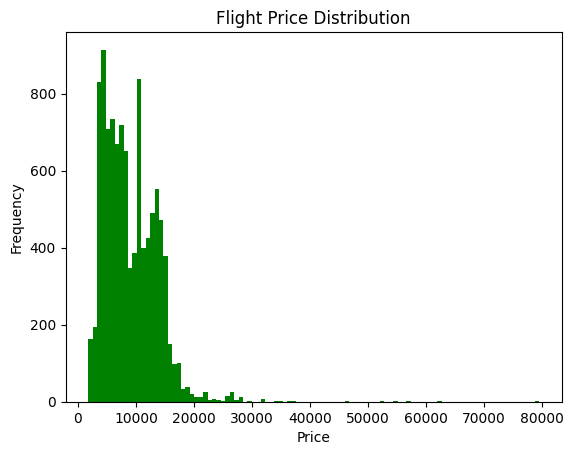

In [30]:
#Price Distribution graph
plt.hist(df['Price'], bins=int(np.sqrt(len(df['Price']))), color= 'green')
plt.title("Flight Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


**Airlines vs Prices**

In [31]:
#Average prices by airline
avg_prices = df.groupby('Airline')['Price'].mean().sort_values()
avg_prices

Airline
8     4140.000000
4     4335.841718
7     5593.745283
1     5668.469897
6     5861.056701
5     7809.014583
2     9556.608028
3    10908.228288
0    11674.724771
Name: Price, dtype: float64

<ipython-input-33-50e027e19c2d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='Price', data=df, palette='pastel')


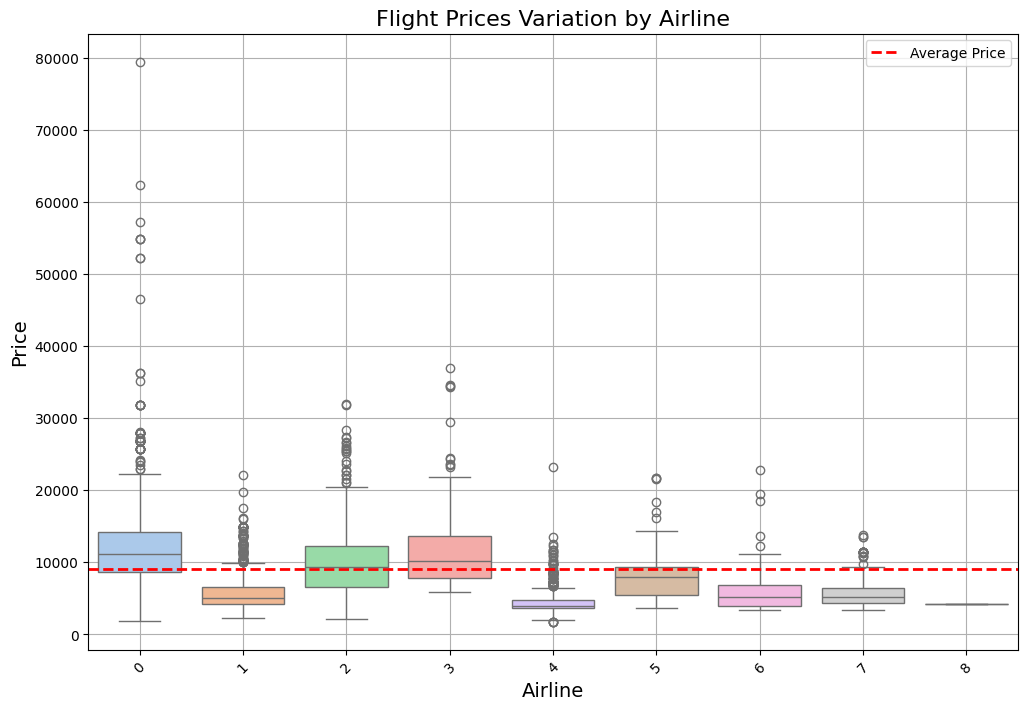

In [33]:
# Creating a boxplot for each airline vs price
plt.figure(figsize=(12, 8))  # Increase figure size

# Create the boxplot
sns.boxplot(x='Airline', y='Price', data=df, palette='pastel')

# Add title and labels with larger font size
plt.title("Flight Prices Variation by Airline", fontsize=16)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Price", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(True)

# Add a horizontal line representing the average price
average_price = df['Price'].mean()
plt.axhline(average_price, color='red', linestyle='--', linewidth=2, label='Average Price')

# Add legend
plt.legend()

# Show plot
plt.show()

By above graph, it is quite evident that'0' flight airlines are most expensive ones. Referring to the aforementioned labelling, the airline is : Jet Airway.
on the other hand, Trujet is the cheapest.

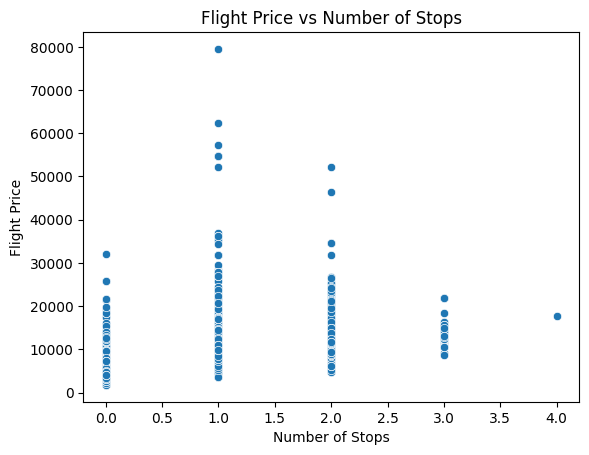

In [38]:
# relationship between the flight price and the number of stops.
sns.scatterplot(x='Total_Stops', y='Price', data=df)
plt.xlabel('Number of Stops')
plt.ylabel('Flight Price')
plt.title('Flight Price vs Number of Stops')

# Display the plot
plt.show()


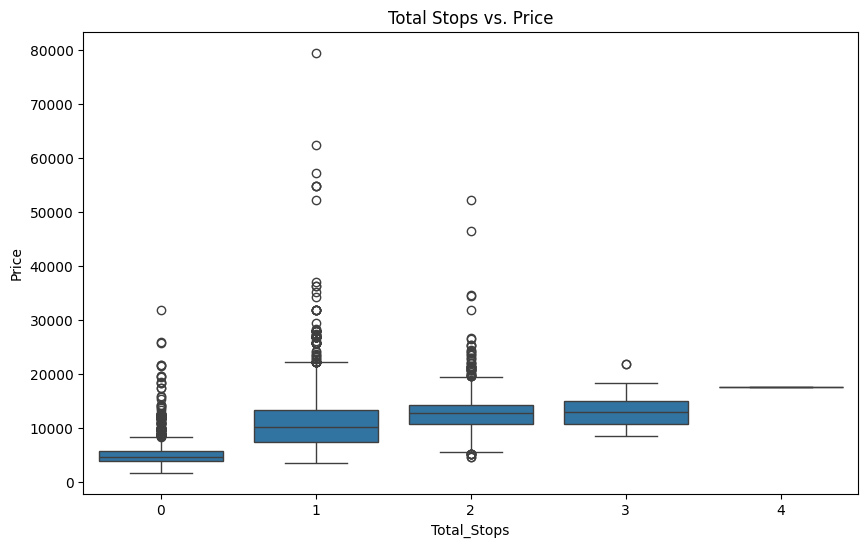

In [39]:
#Total Stops vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Total Stops vs. Price')
plt.show()

According to graphs, it seems that increasing no. of stop doesnt guarantee the decrease in prices. Although, the prices seem to increase with increase in stops.

**OUTLIERS** IN THE DATASET

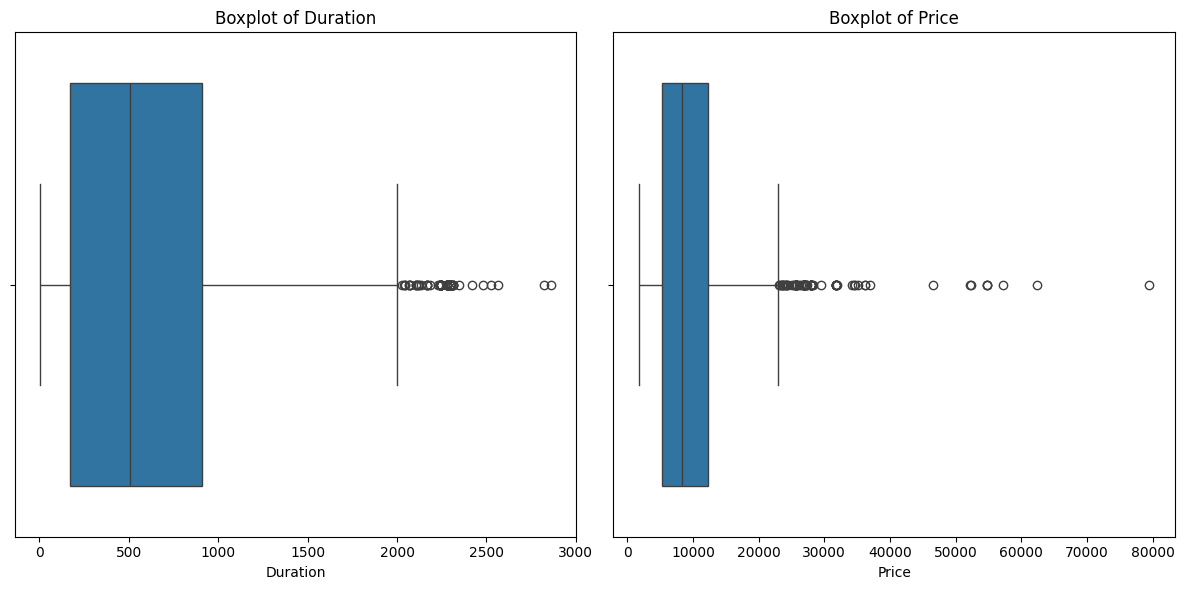

In [41]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot for 'Duration'
sns.boxplot(x=df['Duration'], ax=axes[0])
axes[0].set_title('Boxplot of Duration')

# Boxplot for 'Price'
sns.boxplot(x=df['Price'], ax=axes[1])
axes[1].set_title('Boxplot of Price')

# Show the plot
plt.tight_layout()
plt.show()


Potentially, the outliers can exist in these two specific columns, duration and price. So, to check the outliers, box plot for both of them has been created and it can be noticed that there are many outliers existing in both of these columns.Now, there can be numerous for these outliers to exist, maybe there have been one additional zero added accidentally or due to some circumstances, there are genuine extreme values. Here, there are very limited data points which are extreme values as most of the outliers are near whiskers which suggests there are multiple groups or subpopulations within the data. The cluster of dots near the whisker may represent the majority of the data, while the outliers far from the whisker may represent a separate subgroup or unusual occurrences. The extreme values might impact the skewness, mean and other central tendancies. It would be wise to drop or know the porper reason for these outliers to avoid any potential harm to the analysis.

**Identifying the Peak season**

In [43]:
# Month by month flights
flights_by_month = df['Price'].groupby(by = df['month']).count()
flights_by_month

month
03    2676
04    1078
05    3395
06    3311
Name: Price, dtype: int64

Most flights were taken in 05th month i.e. June but is it due to travel season or something else ? lets see
**Revenue or Price Trends**: by Analysing the average ticket prices or total revenue generated for each month. Higher prices or revenue might indicate peak travel seasons when demand is high.
D**estination Preferences**: Analysing the popularity of different destinations during specific months. Some locations might attract more visitors during certain seasons due to climate, cultural events, or natural attractions.

<ipython-input-44-fc6ab9f982ed>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_month.index, y=average_price_by_month.values, palette='viridis')


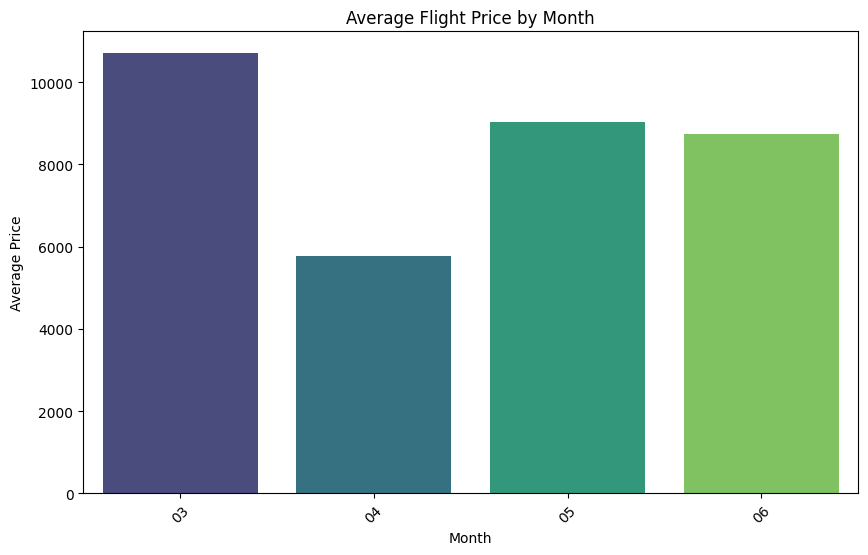

In [44]:
# Group the data by month and calculating the average price for each month
average_price_by_month = df.groupby('month')['Price'].mean().sort_index()

# Plot the average price by month
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_month.index, y=average_price_by_month.values, palette='viridis')
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x800 with 0 Axes>

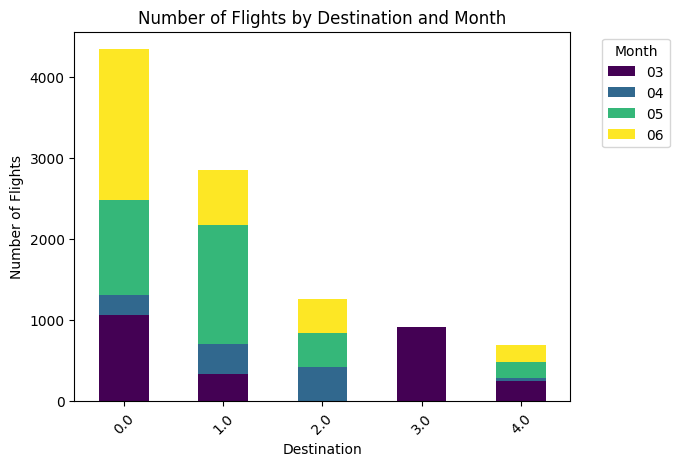

In [48]:
# Group the data by destination and month and calculate the count of flights for each combination
flight_counts_by_destination_month = df.groupby(['Destination', 'month']).size().unstack()

# Plot the bar plot with 20% transparency
plt.figure(figsize=(12, 8))
flight_counts_by_destination_month.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Number of Flights by Destination and Month')
plt.xlabel('Destination')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Cochin have been the most popular destination in 6th and 5th month especially. The second one is banglore.

If to advise a travel company. I had suggest, rather increasing prices in 3rd month, it would be more beneficial to increase prices in 5th and 6th month. Especially, for banglore and cochin.

**Analysing flight prices**

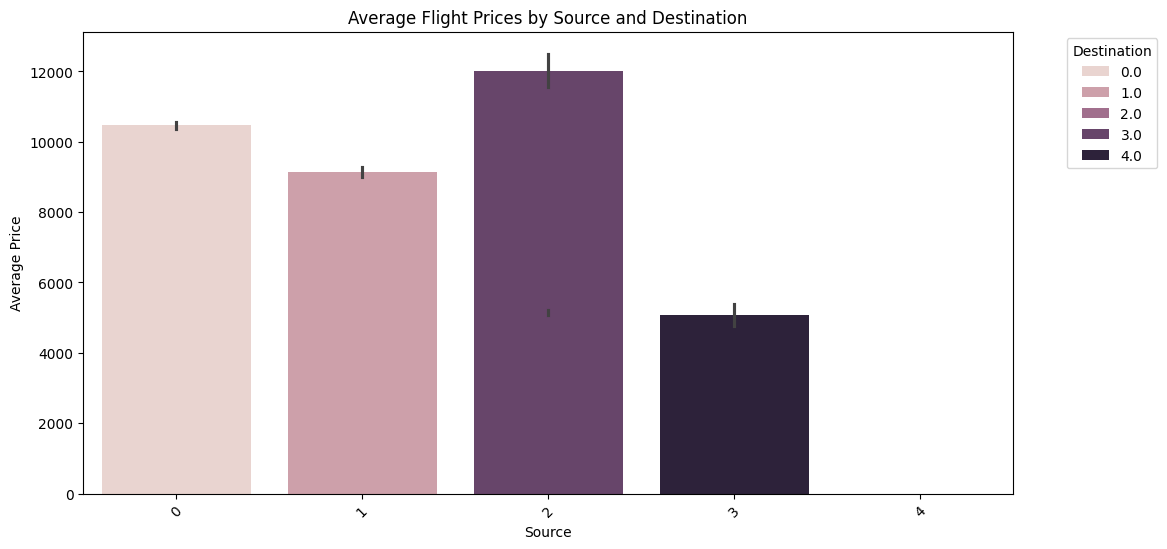

In [49]:
# Create a bar plot of average flight prices by source and destination
plt.figure(figsize=(12, 6))
sns.barplot(x='Source', y='Price', hue='Destination', data=df)
plt.title('Average Flight Prices by Source and Destination')
plt.xlabel('Source')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-50-b3048b6ffd7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


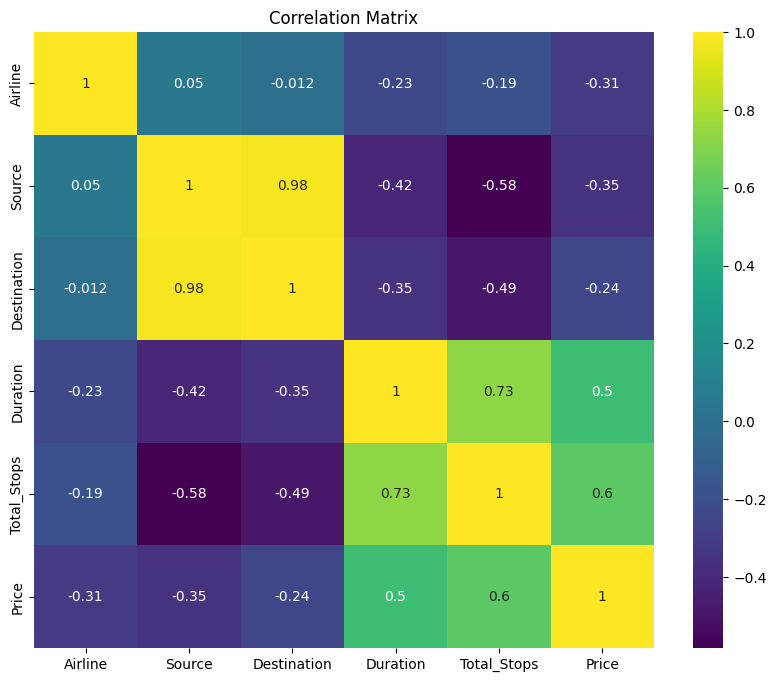

In [50]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()


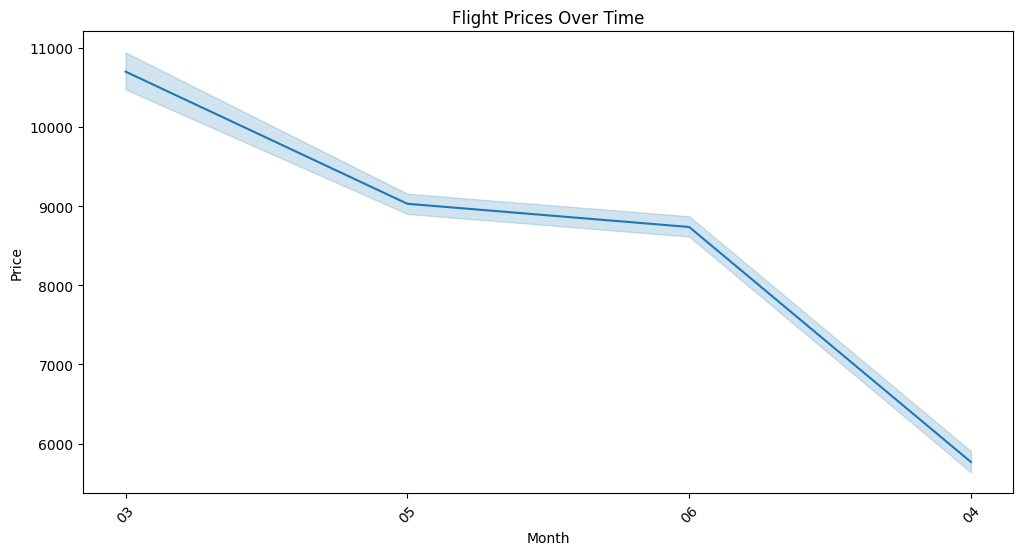

In [61]:
# Create a time series plot of flight prices over month time
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Price', data=df)
plt.title('Flight Prices Over Time')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

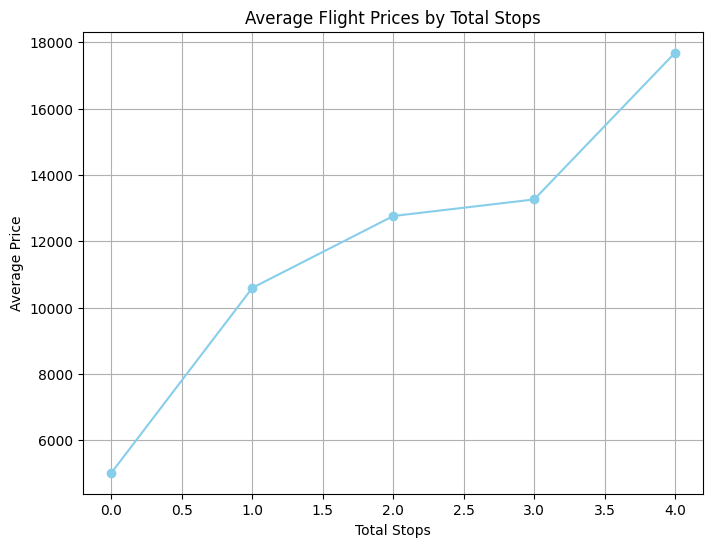

In [64]:
# Group the data by total stops and calculate the mean price for each group
mean_prices_by_stops = df.groupby('Total_Stops')['Price'].mean()

# Plot the average flight prices by total stops
plt.figure(figsize=(8, 6))
plt.plot(mean_prices_by_stops.index, mean_prices_by_stops.values, marker='o', color='skyblue', linestyle='-')
plt.title("Average Flight Prices by Total Stops")
plt.xlabel("Total Stops")
plt.ylabel("Average Price")
plt.grid(True)  # Add gridlines for better readability
plt.show()


<ipython-input-65-c4768ea15e4d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_price = df.corr()['Price'].drop('Price')  # Drop 'Price' to avoid self-correlation


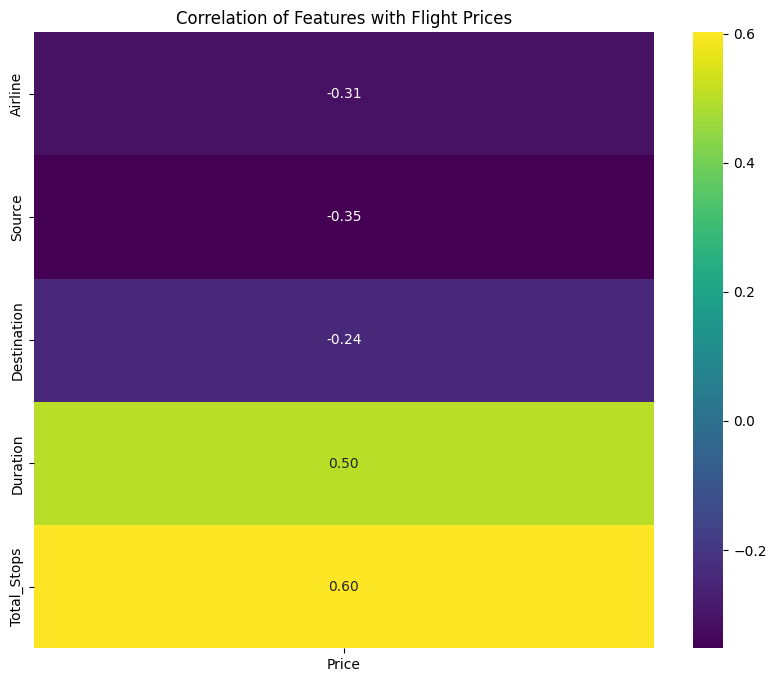

In [65]:
# Calculate the correlation matrix
corr_with_price = df.corr()['Price'].drop('Price')  # Drop 'Price' to avoid self-correlation

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_price.to_frame(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation of Features with Flight Prices')
plt.show()
